In [1]:
import networkx as nx
import pandas as pd
from networkx.algorithms.assortativity.mixing import mixing_dict
from networkx.utils import dict_to_numpy_array
from networkx.utils import accumulate
import scipy.stats as stats
import numpy as np  
import matplotlib.pyplot as plt 
import math
import random
import powerlaw

In [2]:
m_Growth_Step =  9194
MAX_NUM_NODE = 101000
MAX_NUM_LINK = 303000
VERYBIG = 1000000
m_Initial_L = 15
m_Initial_N = 10
m_Para_P = 0.3
m_Para_Q = 0.1
m_Para_M = 3
m_Para_U = 0.0
m_Para_W = 0.6
m_delta = 0.048
MAX_TRY = 10000
#m_NumNode = [m_Initial_N]
#m_NumLink = [0]
m_If_InteractiveGrowth = True  

# Generate FPF Model

In [3]:
def Do_AddNewNode(thisNodeID): 
    m_Node_num_nghb[thisNodeID] = 0;

In [4]:
def Do_GetRandom(theBase):
    return random.uniform(0, theBase)  

In [5]:
def Do_GetRandom_int(theBase):
    return random.randint(0,theBase)

In [6]:
def Do_IfHasNode(Start, End , NumNode):
    if Start == End or Start > NumNode or End > NumNode or Start < 0 or End < 0:
        return True
    else:
        return False


In [7]:
def Do_IfHasLink (thisStart, thisEnd):
    for iii in range(len(m_Link)):
        if m_Link[iii][1][0] == thisStart:
            if m_Link[iii][1][1] == thisEnd:
                return True 
        if m_Link[iii][1][0] == thisEnd:
            if m_Link[iii][1][1] == thisStart:
                return True
    return False        

In [8]:
def update_tempDoubleX(Node_ID):
    K = m_Node_num_nghb[Node_ID]
    Exponent = 1 + m_delta * np.log10(K)
    tempDoubleX[Node_ID] = K ** Exponent

In [9]:
def Do_GenerateInitialStatus():
    
    for iii in range(m_NumNode[0]):
        Do_AddNewNode(iii)
    
    for iii in range(m_Initial_N):
        temp = 0
        tempStart = iii
        
        
        while True: 
            tempEnd = Do_GetRandom_int(m_NumNode[0]-1)
            temp = temp + 1
            if Do_IfHasNode(tempStart, tempEnd, m_NumNode[0]) == False and Do_IfHasLink (tempStart, tempEnd) == False:
                break           
            if temp > MAX_TRY:
                return False
              
        m_Link.append([iii,[tempStart, tempEnd]])
        m_NumLink[0] = m_NumLink[0] + 1
        m_Node_num_nghb[tempStart] = m_Node_num_nghb[tempStart] + 1
        if tempEnd not in m_Node_num_nghb: 
            Do_AddNewNode(tempEnd)
        m_Node_num_nghb[tempEnd] = m_Node_num_nghb[tempEnd] + 1 
    
    for iii in range(m_Initial_N , m_Initial_L):
        temp = 0
        
        while True:
            tempStart = Do_GetRandom_int(m_NumNode[0]-1)
            tempEnd = Do_GetRandom_int(m_NumNode[0]-1)
            temp = temp + 1
           
            if Do_IfHasNode(tempStart, tempEnd, m_NumNode[0]) == False and Do_IfHasLink (tempStart, tempEnd) == False:
                break
            if temp > MAX_TRY:
                return False
            
        m_Link.append([iii,[tempStart, tempEnd]]) 
        m_NumLink[0] = m_NumLink[0] + 1
        if tempStart not in m_Node_num_nghb: 
            Do_AddNewNode(tempStart)
        m_Node_num_nghb[tempStart] = m_Node_num_nghb[tempStart] + 1
        if tempEnd not in m_Node_num_nghb: 
            Do_AddNewNode(tempEnd)
        m_Node_num_nghb[tempEnd] = m_Node_num_nghb[tempEnd] + 1 
        
        
    for iii in range(m_NumNode[0]):
        update_tempDoubleX(iii)

In [10]:
def Do_Get_Node_PFP(thisExecption):
    total = 0
    for iii in range(m_NumNode[0]):
        #K = m_Node_num_nghb[iii]
        #Exponent = 1 + m_delta * np.log10(K)
        #tempDoubleX[iii] = K ** Exponent
        total = total + tempDoubleX[iii]
    
    while True :
        tempA = 0 
        tempDouble  = Do_GetRandom(total)
        for iii in range(m_NumNode[0]):
            tempB = tempA + tempDoubleX[iii]
            if tempB >= tempDouble and tempDouble >= tempA:
                if iii == thisExecption:
                    break
                return iii
            tempA = tempB


In [11]:
def Do_Grow_Link_Interactive(thisStartNode):
    temp = 0
    
    while True:
        tempEndNode = Do_Get_Node_PFP(thisStartNode)
        temp = temp + 1
        if Do_IfHasNode(thisStartNode, tempEndNode, m_NumNode[0]) == False and Do_IfHasLink (thisStartNode, tempEndNode) == False:
            break
        if temp > MAX_TRY:
            return -1;

    m_Link.append([m_NumLink[0],[thisStartNode, tempEndNode]])
    m_NumLink[0] = m_NumLink[0] + 1
    
    
    m_Node_num_nghb[thisStartNode] = m_Node_num_nghb[thisStartNode] + 1
    m_Node_num_nghb[tempEndNode] = m_Node_num_nghb[tempEndNode] + 1 
    
    update_tempDoubleX(thisStartNode)
    update_tempDoubleX(tempEndNode)
    
    
    return tempEndNode


In [12]:
def Do_Grow_Link_NonInteractive():
    temp = 0 
    while True:
        tempStartNode = Do_Get_Node_PFP(-1)
        tempEndNode  = Do_Get_Node_PFP(tempStartNode)
        temp = temp + 1
        if Do_IfHasNode(tempStartNode, tempEndNode, m_NumNode[0]) == False and Do_IfHasLink (tempStartNode, tempEndNode) == False:
            break
        if temp > MAX_TRY:
            return -1;

    m_Link.append([m_NumLink[0],[tempStartNode, tempEndNode]])
    m_NumLink[0] = m_NumLink[0] + 1
    
    
    m_Node_num_nghb[tempStartNode] = m_Node_num_nghb[tempStartNode] + 1
    m_Node_num_nghb[tempEndNode] = m_Node_num_nghb[tempEndNode] + 1
    
    return 1
    

In [13]:
def Do_GeneratePFPNetwork():
    for iii in range(m_Growth_Step):
        Do_AddNewNode(m_NumNode[0])
        temp = Do_GetRandom(1)
        
        if temp < m_Para_P + m_Para_Q:
            theEndNode = Do_Grow_Link_Interactive(m_NumNode[0])
            if m_If_InteractiveGrowth == True:
                Do_Grow_Link_Interactive(theEndNode)
                Do_Grow_Link_Interactive(theEndNode)
            else:
                Do_Grow_Link_NonInteractive()
                Do_Grow_Link_NonInteractive()
                
        elif temp < m_Para_P + m_Para_Q + m_Para_W:
            Do_Grow_Link_Interactive(m_NumNode[0])
            theEndNode = Do_Grow_Link_Interactive(m_NumNode[0])
            
            if m_If_InteractiveGrowth == True:
                #Do_test( theEndNode, tempNode)
                Do_Grow_Link_Interactive(theEndNode)
            else:
                Do_Grow_Link_NonInteractive()
     
        else:  
            for ttt in range(m_Para_M):
                Do_Grow_Link_Interactive(m_NumNode[0])
        
        m_NumNode[0] = m_NumNode[0] + 1
        


In [14]:
def degree_rich_club_coefficient(G):
    deg = G.degree()
    rich_club = []
    rich_club_coefficient = 0.0
    for x in range(1,200):
        a  = dict((k, v) for k, v in deg.items() if v > x)
        N = len(a)
        if N == 1:
            break
        nodes = set(a)
        edges = 0
        for start_id, end_id in G.edges(nodes):
            if start_id in nodes:
                if end_id in nodes:
                    edges = edges + 1
        if rich_club_coefficient != edges/((N*(N-1))/2):
            rich_club_coefficient = edges/((N*(N-1))/2) 
            if rich_club_coefficient != 0:
                rich_club.append((x,rich_club_coefficient))
    return rich_club

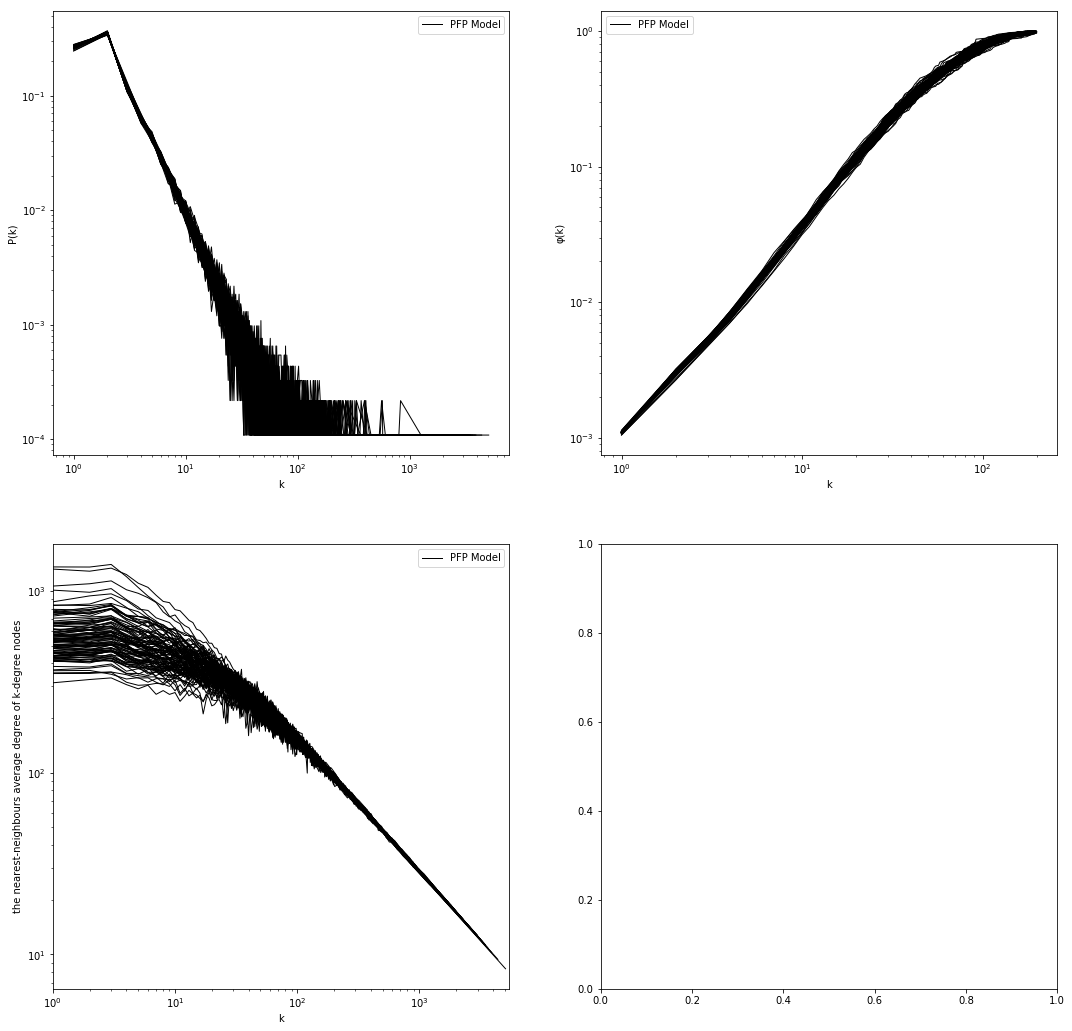

In [79]:
First_order_Excess_Degree = 0
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(18, 18))
Maximum_degree = 0
Average_triangle = 0
average_clustering = 0
Xita = 0
for tempindex in range(100):
    
    m_NumNode = [m_Initial_N]
    m_NumLink = [0]
    m_Node_num_nghb = {}
    tempDoubleX = {}
    m_Link = []
    Do_GenerateInitialStatus()
    Do_GeneratePFPNetwork()
    a = []
    for i in range(len(m_Link)):
        a.append( [m_Link[i][1][0],m_Link[i][1][1]])
    G = nx.Graph(a)
    
    #First-order Excess Degree
    First_order_Excess_Degree = First_order_Excess_Degree + nx.degree_assortativity_coefficient(G)
    
    #Degree Distribution
    temp_x = []
    temp_y = []
    degree_G =  nx.degree_histogram(G)          
    xx_G = range(len(degree_G))                             
    yy_G = [z / float(sum(degree_G)) for z in degree_G] 
    for index in range(len(xx_G)):
        if yy_G[index] != 0:
            temp_x.append(xx_G[index])
            temp_y.append(yy_G[index])  
    plt.subplot(2,2,1)
    
    if tempindex == 1 :
        plt.loglog(temp_x,temp_y,color="black",linewidth=1,label="PFP Model")
        plt.legend() 
    else:
        plt.loglog(temp_x,temp_y,color="black",linewidth=1)
        
    plt.xlabel('k')
    plt.ylabel('P(k)')
    
    
    
    Xi = np.array(np.log10(temp_x[6:40]))
    Yi = np.array(np.log10(temp_y[6:40]))
    
    Xita = Xita + np.polyfit(Xi, Yi, 1)[0]
    
    
    #Maximum degree
    Maximum_degree = Maximum_degree + max(G.degree().items(), key=lambda x: x[1])[1]
    
    #rich-club conectivity
    degree_rich_club_G = degree_rich_club_coefficient(G)
    
    xxx_G = []
    yyy_G = []
    for iii in range(len(degree_rich_club_G)):
        xxx_G.append(degree_rich_club_G[iii][0])
    for iii in range(len(degree_rich_club_G)):
        yyy_G.append(degree_rich_club_G[iii][1])
    plt.subplot(2,2,2)
    
    if tempindex == 1 :
        plt.loglog(xxx_G, yyy_G,'-',color="black",linewidth=1,label="PFP Model")
        plt.legend()
    else:
        plt.loglog(xxx_G, yyy_G,'-',color="black",linewidth=1)
        
    plt.ylabel('φ(k)')
    plt.xlabel('k')
    #plt.legend() 
    
    
    #degree correlation
    degree_correlation = nx.k_nearest_neighbors(G)
    
    r = []
    rr = []
    for t in sorted(degree_correlation):
        r.append(t)
        rr.append(degree_correlation[t])
    plt.subplot(2,2,3)   
    if tempindex == 1 :
        plt.loglog(r,rr,linewidth=1,color="black",label="PFP Model")
        plt.legend()
    else:
        plt.loglog(r,rr,linewidth=1,color="black")
        
    
    plt.xlim(xmin=0)
    plt.xlabel('k')
    plt.ylabel('the nearest-neighbours average degree of k-degree nodes')
    #plt.legend() 
    
    
    avg_kt = sum(nx.triangles(G).values()) / len(nx.triangles(G))
    Average_triangle = Average_triangle + avg_kt
     
    average_clustering = average_clustering + nx.average_clustering(G) 
        
   
plt.show()
    

In [72]:
Maximum_degree/100

2538.91

In [73]:
len(G.edges())

27597

In [74]:
First_order_Excess_Degree/100

-0.22934304056887889

In [75]:
Average_triangle/100

17.911802477183834

In [76]:
average_clustering/100

0.3015289304453112

In [77]:
Xita/100

-2.3454485358994663